## Messy Midterm File

#### Preliminary Ideas

- Initially wanted to look at types of food datasets
- Then wanted to compare food inspection violations to timeline of covid, but enough finding data is matching locations proved to be somewhat difficult
- Finding food data to relate to covid seemed too scarce, or not widespread enough, so I left that idea

#### Imports

In [1]:
#Setup and imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

vac_raw = pd.read_csv('data/country_vaccinations.csv')
#Wouldn't work, there were special characters
#econ_raw = pd.read_csv('data/economic_freedom_index2019_data.csv')
econ_raw = pd.read_csv('data/economic_freedom_index2019_data.csv', encoding='latin-1')

In [2]:
pd.set_option('display.max_rows', 20) 
pd.set_option('display.max_columns', 20) 


#Some random lines to try and determine why the offset between CountryID and the index in the econ data changed

#econ[econ['CountryID'] == econ.shift()['CountryID']]
#econ[econ['CountryID'] == econ.shift()['CountryID'].dropna().astype(int)]
#len(econ.shift()['CountryID'].dropna().astype(int))
#econ.loc[econ['CountryID'].shift(1) != econ['CountryID']] 
#econ['CountryID'].value_counts()
#econ[econ['CountryID'] != econ.shift()['CountryID']+1]


#### Societal Problem

The issue of the Coronavirus pandemic is one that the entire world is not only extremely aware of, but one that has greatly impacted the lives of most. With development of effective vaccines, countries around the world are working to deliver vaccines to their residents as efficiently as possible. However, every country may not have equal access to the vaccine, and well-to-do countries may have much easier access to the vaccine than their less well-off counterparts. Insight into vaccine distribution among different countries could potentially highlight a problem of inequalities of Covid-19 vaccine distributions across the world.

#### Problem Justification

Receiving the Covid vaccine is vital in protecting against Covid-19, just like how the flu vaccine is vital
to avoid contraction of the flu. More vaccines will lead to less people contracting Covid, thus dramatically reducing the 
spread. According to the Centers for Disease Control and Prevention, "COVID-19 vaccination will be an important tool to
help stop the pandemic." <sup>1</sup> 

However, vaccines must be bought before they can be distributed, which can make it more difficult to obtain in poorer countries. As a result, Covid may remain a continuous problem in those areas. The obvious impact of Covid's continued existence is the detrimental health effects. The virus has caused almost 2.82 million deaths worldwide as of April 1st, 2021, however has infected almost 130 Million people worldwide.<sup>2</sup> Commonly observed effects of the virus include, but are not limited to, fever, cough, fatigue, and nausea<sup>3</sup>, however there is no way to be sure of the long term effects of the virus. In fact, studies have begun to find evidence of hidden neurological long term effects of Covid-19. Harvard studies have found that some individuals who have recovered from the virus show impaired attention ability, likely due to oxygen deprevation in the brain, which leads to minor brain damage. Covid infection may also lead to higher risk of alzheimers in the future. <sup>4</sup> 

In additon to health risks, Coronavirus has posed as a major risk to the global economy. Travel and tourism industries have suffered due to lockdowns
in many parts of the world. Airlines experienced a large dropoff in revenue due to the fact that there is very little need for flights during a pandemic. <sup>5</sup> Additionally, countries with economies that heavily depend on tourism, such as Jamaica, have seen dramatic declines in their economy. <sup>6</sup> Equally as important, there has been a decline in consumer demand for products due to the fact that so many places have some type of lockdown enforced. This decrease in demand has led to cuts in the number of workers in an effort to optimize company revenue, resulting in increased global unemployment and a $3.5 trillion loss in global income. <sup>7</sup>

It is obvious that mitigating these detrimental effects of Covid-19 is important for not only global health, but also the global economy. By exploring possible sources of distribution inequalities, we can gain some insight into the patterns of global vaccine distribution. 

#### Research Questions

  - How is the Covid-19 vaccine distribution different between countries? 
  - How do economic indicators, such as GDP  
    and unemployment rate relate to the amount of vaccines distributed within a given country? 
  - How do these factors relate to how soon the first vaccines were administered within that country?

Gross Domestic Product (GDP) is a good metric due to the fact that is measures the monetary value of goods and services produced within a country. This provides an easily accessible metric for each country in question and is especially appropriate because we want to determine how vaccine distribution depends on the economic well-being of a country, which is well expressed by GDP.<sup>10</sup> In turn, unemployment rates have been greatly impacted by the pandemic and can reflect the recent impacts on the economy due to Covid-19.<sup>7</sup> It is important to consider these factors for the entire world rather than just a specific country because of the nature of Covid-19. The virus has impacted the entire globe and shut down international travel and had detrimental effects on the world economy because countries rely on each other for trading.<sup>11</sup> Looking at specific countries would not suffice because of how connected countries are to each other. A solution to stopping the spread of Covid-19 will have to consider the entire globe. 

Identifying if there is a relationship between vaccine distribution and economic indicators could help determine ways to stop the spread of Covid-19.
The importance of stoping the spread of Covid-19 is clear, and by determining where vaccine distribution is weaker than other countries, efforts can be made to make vaccines more readily available for individuals within those areas. 

#### Datasets

In [3]:
len(vac_raw['country'].unique()) #Number of countries
#BEWARE: There are 195 countries but only 136 reported. We cant make generalizations for the whole globe off of this

136

[Country Vaccinations](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) - 
This dataset provides vaccination information such as vaccination brand, date, total vaccinations, total people fully vaccinated for a total of 136 different countries. Similar information is available in terms of percentages rather that total numbers. We will be concerned with the total count data so that we are fair when comparing countries of greatly different population sizes. 
<br> [Economic Freedom Index](https://www.kaggle.com/lewisduncan93/the-economic-freedom-index) - This dataset provides lots of data regarding government spending, variations of GDP, unemployment, and numerous measures of freedom, such as business, labor, monetary, and trade freedom, for 186 diffrent countries. We will concern ourselves with country name, (region??), GDP, GDP per Capita, and unemployment rate. 

#### Manipulation

###### Set up econ

In [4]:
#econ[econ['Country Name'] != econ['WEBNAME']]      #See the differences between the two columns
econ = pd.DataFrame()
econ['Country Name'] = econ_raw['Country Name']
econ['Region'] = econ_raw['Region']
econ['GDP (Billions, PPP)'] = econ_raw['GDP (Billions, PPP)']
econ['GDP per Capita (PPP)'] = econ_raw['GDP per Capita (PPP)']
econ['Unemployment (%)'] = econ_raw['Unemployment (%)']

###### Set up vac

In [5]:
vac = pd.DataFrame()
vac['country'] = vac_raw['country']
vac['date'] = vac_raw['date']
vac['total_vaccinations'] = vac_raw['total_vaccinations']
vac['people_vaccinated'] = vac_raw['people_vaccinated']
vac['people_fully_vaccinated'] = vac_raw['people_fully_vaccinated']
vac['daily_vaccinations'] = vac_raw['daily_vaccinations']
vac['total_vaccinations_per_hundred'] = vac_raw['total_vaccinations_per_hundred']
vac['people_vaccinated_per_hundred'] = vac_raw['people_vaccinated_per_hundred']
vac['people_fully_vaccinated_per_hundred'] = vac_raw['people_fully_vaccinated_per_hundred']

114

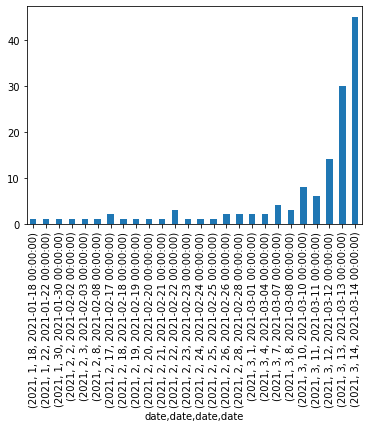

In [6]:
import matplotlib.ticker as ticker

pd.set_option('display.max_rows', None) 
#BEWARE: All data is not from the same data... "most recent" is different for different countries
vac.groupby(['country', 'date'])['total_vaccinations'].max()
latest = vac.groupby(['country'])['date'].max().astype('datetime64')     #This we can see a wide rande of most recent reportings for each country
vac['date'].astype('datetime64')
#vac['date'].astype('int')
#plt.hist(latest, bins=10)
#plt.xticks(10)      #worth a shot
#plt.locator_params(axis='x', nbins=10)

#Im just trying to change the xaxis tick marks ugh

#fig, ax = plt.subplots(1,1)
#ax.plot(vac['date'])
#ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
#plt.show()
#q = latest.apply(lambda x: x.value)
#w = q.apply(lambda x: x - q.min())
#plt.hist(w, bins = [i for i in range(w.min(), w.max(), int((w.max()-w.min())/15))])
#plt.xticks([round(i,1) for i in range(w.min(), w.max(), int((w.max()-w.min())/15))])
#[round(i,1) for i in range(w.min(), w.max(), int((w.max()-w.min())/15))]

mine = latest.groupby([latest.dt.year, latest.dt.month, latest.dt.day]).value_counts().plot(kind="bar")
#plt.xticks([latest.unique()])
#pd.Series(latest.unique()).sort_values(latest.dt.day)

#Too much time just looking at the distribution of latest report dates... this graph gives enough data just for
#my knowledge... probably wont include in the final at this point
latest[latest >= '2021-03-01'].count()

In [7]:
latest[latest >= '2021-03-01'].count()/latest.count()    #Percent of countries with dates on/after March 1st

0.8382352941176471

In [30]:
#df.loc[df.groupby(["sp", "mt"])["count"].idxmax()]
pd.set_option('display.max_rows', None) 

vac = vac[vac['date'] >= '2021-03-01']        #Remove all  entries with dates before march
vac = vac.drop(vac[vac['total_vaccinations'].isnull()].index.values)   #Remore all entries with NaN total vaccination count
#vac.groupby('country')['date'].astype('datetime64').idxmax()     #Many variations of this tried
vac = vac.drop_duplicates(['country'], keep='last')
#vac = vac.reset_index()
#vac = vac.drop(['level_0'], axis=1)
#vac

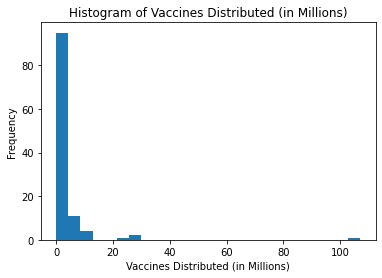

count    114.000000
mean       2.910631
std       10.886642
min        0.001215
25%        0.040812
50%        0.256012
75%        1.253572
max      107.060274
Name: total_vaccinations, dtype: float64

In [51]:
plt.hist(vac['total_vaccinations'].apply(lambda x: x/1000000), bins=25)
#vac['total_vaccinations'].apply(lambda x: x/1000)
plt.title("Histogram of Vaccines Distributed (in Millions)")
plt.xlabel('Vaccines Distributed (in Millions)')
plt.ylabel('Frequency')
plt.show()
vac['total_vaccinations'].apply(lambda x: x/1000000).describe()

In [32]:
#Thats crazy! Half of the countries have given below 250,000 vaccines an 75% below 1,250,000. However the max is 107M. 
vac['total_vaccinations'].sort_values()
#We can see that there is that one outlier

104         1215.0
102         2076.0
85          2094.0
58          3536.0
68          3793.0
86          4832.0
1           4914.0
40          5130.0
111         5248.0
2           6169.0
27          7202.0
11          7444.0
76          7579.0
33          8832.0
54          9144.0
66         11431.0
110        12194.0
22         14937.0
71         18000.0
0          23635.0
30         25000.0
61         27637.0
12         27727.0
42         29383.0
41         30890.0
18         31980.0
49         32027.0
113        36359.0
53         39428.0
101        44963.0
38         46136.0
45         46862.0
9          50980.0
105        53155.0
60         54865.0
91         88106.0
57         95888.0
56         97104.0
74         98168.0
24         99275.0
67        100000.0
78        114500.0
64        120073.0
89        131186.0
13        138218.0
29        139359.0
95        145544.0
4         162551.0
16        170659.0
32        185912.0
43        190700.0
109       204169.0
63        20

In [11]:
max = vac['total_vaccinations'].sort_values().dropna().max()
#vac.query('total_vaccinations==max')['country']
#df['A'][df['B'] == 3].values[0]
vac['country'][vac['total_vaccinations'] == max].values[0]
print("The United States are an outlier with ", max, " total vaccines") 
print("Can we remove the US for a second to get insight into the rest of the data")

The United States are an outlier with  107060274.0  total vaccines
Can we remove the US for a second to get insight into the rest of the data


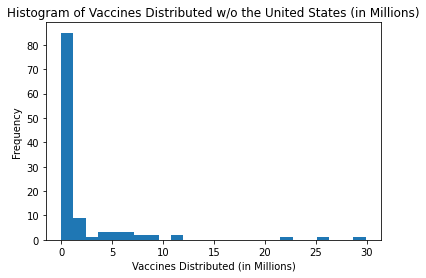

count    113.000000
mean       1.988952
std        4.676598
min        0.001215
25%        0.039428
50%        0.254000
75%        1.163873
max       29.908038
Name: total_vaccinations, dtype: float64

In [52]:
#Now without the US
plt.hist(vac['total_vaccinations'].sort_values()[:-1].apply(lambda x: x/1000000), bins=25)
#vac['total_vaccinations'].apply(lambda x: x/1000)
plt.title("Histogram of Vaccines Distributed w/o the United States (in Millions)")
plt.xlabel('Vaccines Distributed (in Millions)')
plt.ylabel('Frequency')
plt.show()
vac['total_vaccinations'].sort_values()[:-1].apply(lambda x: x/1000000).describe()

At this point, I'll add a new question based off of the distributions of vaccine distribution data
- How even is the current distribution of vaccines across all countries?
**Dont forget to add to final questions**

In [160]:
vac['country'].sort_values()      #looking at the vaccine countries
#econ['Country Name']
#econ

0                   Albania
1                   Andorra
2                    Angola
3                 Argentina
4                 Australia
5                   Austria
6                Azerbaijan
7                   Bahrain
8                Bangladesh
9                  Barbados
10                  Belgium
11                   Belize
12                  Bermuda
13                  Bolivia
14                   Brazil
15                 Bulgaria
16                 Cambodia
17                   Canada
18           Cayman Islands
19                    Chile
20                 Colombia
21               Costa Rica
22            Cote d'Ivoire
23                  Croatia
24                   Cyprus
25                  Czechia
26                  Denmark
27                 Dominica
28       Dominican Republic
29                  Ecuador
30              El Salvador
31                  England
32                  Estonia
33           Faeroe Islands
34                  Finland
35                  

In [166]:
tot_vac = vac['total_vaccinations']
gdps = [[x, econ[econ['Country Name'] == x]['GDP (Billions, PPP)']] for x in vac['country']]

#econ[econ['Country Name'] == 'Australia']['GDP (Billions, PPP)']
#econ
vac['country'].head(5)
#econ[econ['Country Name'] == 'Andorra']
econ['Country Name'].sort_values()

#Oh no! The united kingdom is split up into Northern Ireland, Scotland, Wales, and England
#A few other places are formatted differently, so I'll go back manually or look them up
pd.Series(gdps)
gdps[1][1] = ['$3.2']       #Andorra
gdps[12][1] = ['$7.5']      #Bermuda
gdps[18][1] = ['$5.5']      #Cayman Islands
gdps[22][1] = ['$96.9']     #Cote d'Ivoire
gdps[25][1] = ['$250.7']    #Czechia
gdps[31][1] = ['$2,500']    #England
gdps[33][1] = ['$3.1']      #Faeroe Islands
gdps[38][1] = ['$3.2']      #Gibraltar
gdps[40][1] = ['$3.1']      #Greenland
gdps[42][1] = ['$3.5']      #Guernsey
gdps[49][1] = ['$7.5']      #Isleof Man
gdps[53][1] = ['$6.6']      #Jersey
gdps[58][1] = ['$6.5']      #Liechtenstein
gdps[61][1] = ['$53.9']     #Macao
gdps[72][1] = ['$63.5']     #Northern Ireland
gdps[86][1] = ['$1.7']      #San Marino
gdps[88][1] = ['$205']      #Scotland
gdps[96][1] = ['$2,029.0']  #South Korea
gdps[112][1] = ['$103.7']   #Wales
#list(pd.Series(gdps)[0][1])
realgdps = pd.Series(gdps).apply(lambda x: list(x[1])[0].replace('$','').replace(',', '').strip())
pd.Series(gdps)
#vac     #weird that they have UK AND all the separate components
realgdps
tot_va

0          23635.0
1           4914.0
2           6169.0
3        2381429.0
4         162551.0
5        1026244.0
6         453586.0
7         551197.0
8        4398094.0
9          50980.0
10       1145988.0
11          7444.0
12         27727.0
13        138218.0
14      11422666.0
15        338879.0
16        170659.0
17       3026665.0
18         31980.0
19       6591788.0
20        782301.0
21        241724.0
22         14937.0
23        300956.0
24         99275.0
25       1081907.0
26        834041.0
27          7202.0
28        660000.0
29        139359.0
30         25000.0
31      21683887.0
32        185912.0
33          8832.0
34        682945.0
35       7292852.0
36       8863270.0
37        300000.0
38         46136.0
39       1283472.0
40          5130.0
41         30890.0
42         29383.0
43        190700.0
44       1733557.0
45         46862.0
46      29908038.0
47       5480346.0
48        589512.0
49         32027.0
50       9374827.0
51       6715732.0
52        23

In [12]:
pd.set_option('display.max_rows', 20) 
vac

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
50,Albania,2021-03-01,14295.0,NaN,NaN,1081.0,0.50,NaN,NaN
51,Albania,2021-03-02,NaN,NaN,NaN,1026.0,NaN,NaN,NaN
52,Albania,2021-03-03,15793.0,NaN,NaN,971.0,0.55,NaN,NaN
53,Albania,2021-03-04,NaN,NaN,NaN,927.0,NaN,NaN,NaN
54,Albania,2021-03-05,NaN,NaN,NaN,897.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6320,Zimbabwe,2021-03-10,35901.0,35901.0,NaN,1133.0,0.24,0.24,NaN
6321,Zimbabwe,2021-03-11,36019.0,36019.0,NaN,766.0,0.24,0.24,NaN
6322,Zimbabwe,2021-03-12,36283.0,36283.0,NaN,708.0,0.24,0.24,NaN
6323,Zimbabwe,2021-03-13,36359.0,36359.0,NaN,621.0,0.24,0.24,NaN


#### Sources
<sup>1</sup> Centers for Disease Control and Prevention. *Benefits of Getting a COVID-19 Vaccine.* Centers for Disease Control and Prevention. [https://www.cdc.gov/coronavirus/2019-ncov/vaccines/vaccine-benefits.html. ](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/vaccine-benefits.html)
<br><sup>2</sup> “COVID-19 Dashboard by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU).” *ArcGIS Dashboards*, John Hopkins Coronavirus Resource Center, 2021, [www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6.](www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6.)
<br><sup>3</sup> *Symptoms of Coronavirus*. (2021, February 22). Retrieved April 01, 2021, from [https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html](https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html)
<br><sup>4</sup> Budson, A. (2021, March 04). *The hidden long-term cognitive effects of covid-19*. Retrieved April 01, 2021, from [https://www.health.harvard.edu/blog/the-hidden-long-term-cognitive-effects-of-covid-2020100821133](https://www.health.harvard.edu/blog/the-hidden-long-term-cognitive-effects-of-covid-2020100821133)
<br><sup>5</sup> Szmigiera, M. (2021, March 24). *Impact of the coronavirus pandemic on the global economy - Statistics & Facts*. Retrieved April 01, 2021, from [https://www.statista.com/topics/6139/covid-19-impact-on-the-global-economy/](https://www.statista.com/topics/6139/covid-19-impact-on-the-global-economy/)
<br><sup>6</sup> *Jamaica: Economic Outline*. Mar. 2021, [www.lloydsbanktrade.com/en/market-potential/jamaica/economy](www.lloydsbanktrade.com/en/market-potential/jamaica/economy)
<br><sup>7</sup> “Economic Impact of the COVID-19 Pandemic.” *Wikipedia*, Wikimedia Foundation, 31 Mar. 2021, [en.wikipedia.org/wiki/Economic_impact_of_the_COVID-19_pandemic#Overall_economic_contraction](en.wikipedia.org/wiki/Economic_impact_of_the_COVID-19_pandemic#Overall_economic_contraction)
<br><sup>8</sup> Singh, Ajai R, and Shakuntala A Singh. “Diseases of poverty and lifestyle, well-being and human development.” *Mens sana monographs* vol. 6,1 (2008): 187-225. doi:10.4103/0973-1229.40567
<br><sup>9</sup> “Fact Check: Post Comparing Responses to Tuberculosis and COVID-19 Pandemics Lacks Key Information.” *Reuters*, Thomson Reuters, 19 Aug. 2020, [www.reuters.com/article/uk-factcheck-covid-tb/fact-check-post-comparing-responses-to-tuberculosis-and-covid-19-pandemics-lacks-key-information-idUSKCN25F16X](https://www.reuters.com/article/uk-factcheck-covid-tb/fact-check-post-comparing-responses-to-tuberculosis-and-covid-19-pandemics-lacks-key-information-idUSKCN25F16X) 
<br><sup>10</sup> Inflab. “Is GDP a Good Measure of Economic Well-Being?” *Medium*, Medium, 9 July 2018, [medium.com/@Inflab/is-gdp-a-good-measure-of-economic-well-being-7ad449ded139#:~:text=GDP%20measures%20both%20the%20economy's,expenditure%20on%20goods%20and%20services.&amp;text=Because%20most%20people%20would%20prefer,being%20of%20the%20average%20individual](medium.com/@Inflab/is-gdp-a-good-measure-of-economic-well-being-7ad449ded139#:~:text=GDP%20measures%20both%20the%20economy's,expenditure%20on%20goods%20and%20services.&amp;text=Because%20most%20people%20would%20prefer,being%20of%20the%20average%20individual) 
<br><sup>11</sup> “List of Countries by Leading Trade Partners.” *Wikipedia*, Wikimedia Foundation, 11 Feb. 2021, [en.wikipedia.org/wiki/List_of_countries_by_leading_trade_partners](en.wikipedia.org/wiki/List_of_countries_by_leading_trade_partners) 